In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from textwrap import wrap
from matplotlib.font_manager import FontProperties
import re
from scipy import stats
from matplotlib.lines import Line2D 

line_size=0.5
custom_params = {
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    "axes.spines.right": True, 
    "axes.spines.bottom": True,
    'xtick.direction': 'inout',
    'ytick.direction': 'in',
    'xtick.bottom': True,
    'xtick.minor.visible': False,
    'xtick.major.bottom':  True,
    'xtick.minor.bottom':  True,
    'xtick.major.pad':     7,     # distance to major tick label in points#
    'xtick.minor.pad':     3.4,     # distance to the minor tick label in points#
    'xtick.major.size':    10,
    'ytick.major.size':    4,
    'xtick.major.width':   line_size,
    'ytick.major.width':   line_size,
    'axes.linewidth': line_size,
    'xtick.minor.size':    2,
    'pdf.fonttype': 42}

sns.set_theme(style="ticks", rc=custom_params, font="Arial",font_scale=0.7)

enmax_palette = ["#648FFF", "#FE6100", "#785EF0", "#DC267F", "#FFB000"]
sns.set_palette(palette=enmax_palette)

warnings.filterwarnings("ignore")

4


meta NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped


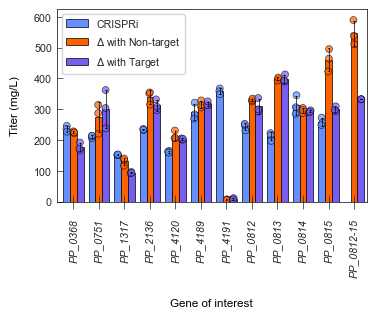

In [3]:
# Load and prepare the data
fig = "KOs_CRISPRi"
df = pd.read_csv('Figure_Data/250226_dCas9_Amalgam_Trunc.csv')

# Define the specific order of strains
strain_order = ['PP_0368', 'PP_0751', 'PP_1317', 'PP_2136', 'PP_4120', 'PP_4189', 'PP_4191', 'PP_0812', 'PP_0813', 'PP_0814', 'PP_0815', 'PP_0812-15']  # Add all your strains in the desired order

# Convert the 'Strain' column to a categorical type with the specified order
df['Strain'] = pd.Categorical(df['Strain'], categories=strain_order, ordered=True)

# Sort the dataframe by the categorical 'Strain' column
df_sorted = df.sort_values(by='Strain')
data = df_sorted.copy()

# Set the custom palette
sns.set_palette(enmax_palette)

# Calculate the width of the figure
w = len(data) / 30
w = 4
print(w)
plt.figure(figsize=(w, 2.5))

with sns.color_palette():
    ax = sns.stripplot(
        data=data, x="Strain", 
        y="Titer", hue='Type', 
        dodge=True, alpha=0.7, linewidth=line_size, edgecolor="0", zorder=2)
    
    ax = sns.barplot(
        data=data, x="Strain", y="Titer", hue='Type',
        errorbar="sd", zorder=0, capsize=0.2, 
        err_kws={'color': '0', 'linewidth': line_size},
        linewidth=line_size, edgecolor="0", saturation=1)
    legend_handles, labels = ax.get_legend_handles_labels()
    
# Format axes and legend
plt.xlabel('Gene of interest', labelpad=15)
plt.ylabel('Titer (mg/L)', labelpad=10)
plt.legend(loc='upper right')
plt.legend(legend_handles, ['_', '_', '_', 'CRISPRi', '$\Delta$ with Non-target', '$\Delta$ with Target'], loc='upper left', ncol=1)

plt.ylim(0, 625)
plt.xticks(rotation='vertical', style='italic')

plt.xlim(-0.65, None)

plt.savefig(f'Figure_Export/{fig}_Target_Non-target.pdf', dpi=1200, bbox_inches='tight')
plt.show()